In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
%matplotlib inline

### DEFINE PROBLEM

Menganalisis data penjualan pada sebuah ecommerce, untuk meningkatkan penjualan.

### GOALS 

- Memperkirakan Category barang yang dijual. Kemudian dari situ baru ditentukan product nya.
- Menentukan Target penjualan sesuai analisis yang nanti akan dilakukan.
- Memperkirakan estimasi diskon yang layak diberikan.


In [137]:
index = []
for i in range (609):
    index.append(i)
df = pd.read_csv("ecommerce.csv")
df.set_index([index])
df = df.drop(columns="Unnamed: 0")
df

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.00,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.00,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.00,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.00,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.00,194.99,94.0,NaN,Eligible for FREE Shipping,men
5,Athletic Shoes,"Nike Sport Sneaker Shoes for Men , 44 EU , White",319.00,234.99,30.0,NaN,FREE Shipping,men
6,Athletic Shoes,Adidas Duramo 9 Running Shoes For Men - Core B...,319.00,233.98,68.0,100.0,FREE Shipping,men
7,Athletic Shoes,"Nike Fitness Shoes For Men , 44.5 EU , Gray",389.00,280.98,71.0,NaN,FREE Shipping,men
8,Athletic Shoes,Nike Air Zoom Pegasus 36 Running Sneakers for ...,609.00,470.99,60.0,NaN,FREE Shipping,men
9,Athletic Shoes,"Nike Court Lite 2 Sneaker for Men , Size 42 EU...",339.00,236.99,33.0,NaN,FREE Shipping,men


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           609 non-null    object 
 1   product            609 non-null    object 
 2   Original_price     583 non-null    float64
 3   price              609 non-null    float64
 4   perc_of_unit_sold  522 non-null    float64
 5   rating             427 non-null    float64
 6   shpping_rate       567 non-null    object 
 7   gender             581 non-null    object 
dtypes: float64(4), object(4)
memory usage: 38.2+ KB


In [139]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,609,7,Watches,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,609,602,Lacoste Casual Shoe for Men Size 44 EU - White,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original_price,583,NaN,NaN,NaN,864.498,1803.37,42,273,499,980,29970
price,609,NaN,NaN,NaN,339.434,285.416,21.4,140.98,262.49,444.99,3220
perc_of_unit_sold,522,NaN,NaN,NaN,57.6782,25.4349,2,36.25,60,79,99
rating,427,NaN,NaN,NaN,87.808,11.4223,20,82,88,96,100
shpping_rate,567,2,FREE Shipping,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,581,3,men,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dapat dilihat dari analisa deskriptif bahwa, category produk yang paling laku secara keseluruhan adalah jam tangan.
- Kemudian untuk product spesifiknya terlihat malah sepatu "Lacoste Casual Shoe for Men Size 44 EU - White" lebih menjadi pilihan, padahal category terbanyak adalah Category jam tangan. Hal ini bisa terjadi kemungkinan disebabkan oleh pembeli jam tangan sangat banyak namun tersebar ke berbagai jenis jam tangan.
- Apabila dilihat dari rata-rata, bisa disimpulkan bahwa, rata-rata diskon(original_price ==> price) berkisar di angka 39.3 %
- Terlihat bahwa kemungkinan suatu item itu terjual rata-rata adalah 58%, dan memiliki kemungkinan terkecil untuk terjual adalah 2% dan kemungkinan terbesarnya adalah 99%. Semua ini tergantung pada apa category dan product yang dijual, harus relevan dengan keinginan pasar, serta target pasarnya harus jelas.


## MengHandle Missing Value

In [140]:
df.isna().sum()

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [141]:
df = df.drop(columns="rating")
# karena rating tidak bisa dikira-kira, itu adalah kuasa customer
# dan karena tidak digunakan dalam analisa, maka akan dilakukan drop untuk kolom ratin

In [142]:
find_null = df[df["Original_price"].isna() | 
            df["price"].isna() |
            df["perc_of_unit_sold"].isna() |
            df["shpping_rate"].isna() |
            df["gender"].isna()].index
## find_null, mencari index dimana kelimata kategori tersebut bernilai null
df = df.drop(find_null,axis=0)
## kemudian di drop, karena variabel yang mau digunakan tidak boleh bernilai null

In [143]:
a = []
for i in range(0,137):
    a.append(find_null[i])
print(a)

[20, 31, 41, 47, 61, 64, 66, 67, 68, 73, 74, 75, 80, 81, 83, 89, 90, 91, 92, 110, 117, 118, 119, 121, 123, 124, 127, 128, 129, 135, 136, 151, 152, 154, 158, 163, 167, 178, 183, 196, 198, 199, 210, 211, 224, 237, 238, 239, 240, 242, 248, 257, 259, 261, 262, 265, 268, 275, 277, 278, 279, 281, 287, 290, 294, 317, 346, 358, 361, 362, 364, 376, 377, 381, 382, 385, 389, 394, 395, 405, 406, 412, 414, 418, 423, 429, 432, 434, 435, 438, 439, 441, 442, 443, 444, 445, 464, 475, 480, 485, 486, 488, 489, 490, 493, 494, 497, 500, 501, 502, 504, 508, 511, 517, 518, 522, 523, 524, 525, 526, 527, 529, 530, 533, 535, 540, 544, 546, 548, 551, 554, 563, 565, 567, 568, 570, 578]


In [144]:
df.isna().sum()

category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
shpping_rate         0
gender               0
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 608
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           472 non-null    object 
 1   product            472 non-null    object 
 2   Original_price     472 non-null    float64
 3   price              472 non-null    float64
 4   perc_of_unit_sold  472 non-null    float64
 5   shpping_rate       472 non-null    object 
 6   gender             472 non-null    object 
dtypes: float64(3), object(4)
memory usage: 29.5+ KB


In [146]:
df.head()

,category,product,Original_price,price,perc_of_unit_sold,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,Eligible for FREE Shipping,men


# ANALISA DATA

In [147]:
df["Diskon"] = (df["price"]/df["Original_price"]).round(2)*100
df

,category,product,Original_price,price,perc_of_unit_sold,shpping_rate,gender,Diskon
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,FREE Shipping,men,71.0
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,FREE Shipping,men,83.0
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,FREE Shipping,women,81.0
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,FREE Shipping,men,66.0
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,Eligible for FREE Shipping,men,75.0
5,Athletic Shoes,"Nike Sport Sneaker Shoes for Men , 44 EU , White",319.0,234.99,30.0,FREE Shipping,men,74.0
6,Athletic Shoes,Adidas Duramo 9 Running Shoes For Men - Core B...,319.0,233.98,68.0,FREE Shipping,men,73.0
7,Athletic Shoes,"Nike Fitness Shoes For Men , 44.5 EU , Gray",389.0,280.98,71.0,FREE Shipping,men,72.0
8,Athletic Shoes,Nike Air Zoom Pegasus 36 Running Sneakers for ...,609.0,470.99,60.0,FREE Shipping,men,77.0
9,Athletic Shoes,"Nike Court Lite 2 Sneaker for Men , Size 42 EU...",339.0,236.99,33.0,FREE Shipping,men,70.0


In [148]:
Category_Fav= pd.crosstab(index = df["category"],columns='TOTAL')
Category_Fav.sort_values('TOTAL',ascending=False).head(10)
## Terlihat bahwa memang jam adalah category favorit

col_0,TOTAL
category,
Watches,128
Eyewear,120
Athletic Shoes,76
Perfumes & Fragrances,60
Casual & Dress Shoes,35
Wallets,29
Sportswear,24


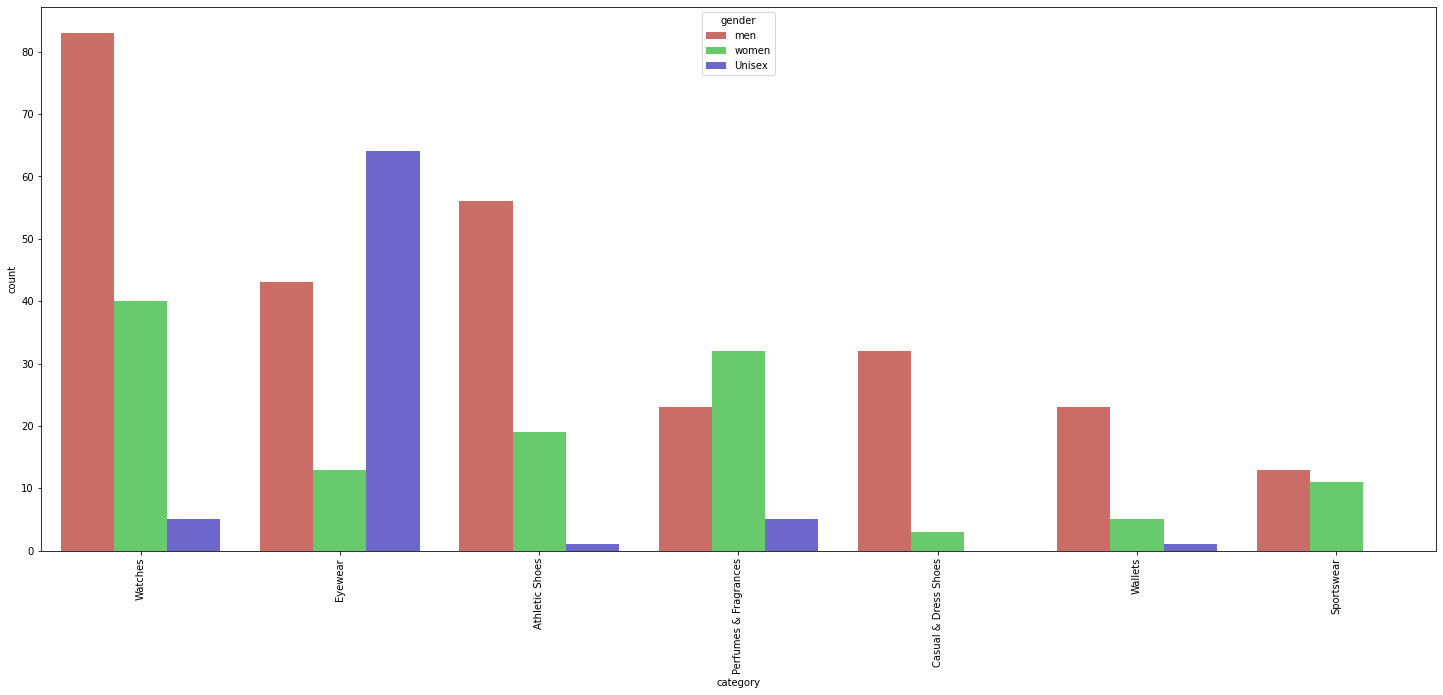

In [149]:
plt.figure(figsize=(25,10))
fig = sns.countplot(x=df['category'], hue=df['gender'], palette="hls", order = df['category'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
# dapat dilihat untuk masing masing gender, category jam dan kacamata mendominasi.

In [150]:
product_Fav_byCategory= pd.crosstab(index = [df["category"],df["product"],df["Diskon"]],columns='TOTAL')
product_Fav_byCategory.sort_values('TOTAL',ascending=False).head(10)
## dapat dilihat dari jumlah Watches mendominasi, dari barplot di atas juga sudah jelas
## namun disini dapat dilihat bahwa sebenarnya diskon tidak terlalu berpengaruh, karena watches yang diskon cuman 32% juga bisa laku

col_0                                                                           TOTAL
category             product                                            Diskon       
Watches              Hugo Boss Casual Round Watch for Men               32.0        2
Casual & Dress Shoes Lacoste Casual Shoe for Men Size 44 EU - White     71.0        2
Wallets              Levi's Men's Trifold Wallet [31LV1179]             43.0        1
                     Kenneth Cole REACTION Men's RFID Security Block... 38.0        1
                     Dockers Bifold Mens Wallet - 31DK240z01-Brown      53.0        1
                     Dickies Trifold Wallet for Men,Brown,31DI210003... 50.0        1
                     Dickies Trifold Wallet for Men - 31DI210004-Red    53.0        1
                     Dickies Bifold Mens Wallet - 31DI1305-Brown        44.0        1
                     DOWNTOWN MINI CC WALLET Men’s Purse, Multicolou... 32.0        1
                     Calvin Klein Elevated Slimfold 6cc, Men’s Credi... 47.0        1

In [151]:
discount = pd.crosstab(index = [df["product"],df["Diskon"]],columns='TOTAL')
discount.sort_values('TOTAL',ascending=False)
## Dapat dilihat untuk masing-masing produk selayaknya diberikan diskon berapa. Bisa dilihat semua dari dalam tabel
## dan sebenarnya tidak terlalu memiliki peranan penting besar sebuah diskon, tetapi teap butuh diskon, untuk mensugesti customer.

,col_0,TOTAL
product,Diskon,
Hugo Boss Casual Round Watch for Men,32.0,2
Lacoste Casual Shoe for Men Size 44 EU - White,71.0,2
"Oud Sharqia for Unisex - Eau de Parfum, 80ml",14.0,1
"Polaroid Sunglasses For Unisex Pld 2061/S00350M9, Grey Lens, Panto Frame",72.0,1
"Polaroid Sunglasses For Men, Multi Color, Pld 2043-S00361Lm, Aviator Frame",49.0,1
"Polaroid Sunglasses For Men, Brown- Pld 6033/S, Square Frame",63.0,1
"Polaroid Sunglasses For Men Pld 1016/Sdl550Lb, Dark Green Lens, Square Frame",67.0,1
"Polaroid Sunglasses , for Women , Mixed , Aviator Lens Shape - Pld 2043/S-80761M9",64.0,1
"Polaroid Sunglass for Men , Grey Lens , PLD 2059/S 003 60",54.0,1


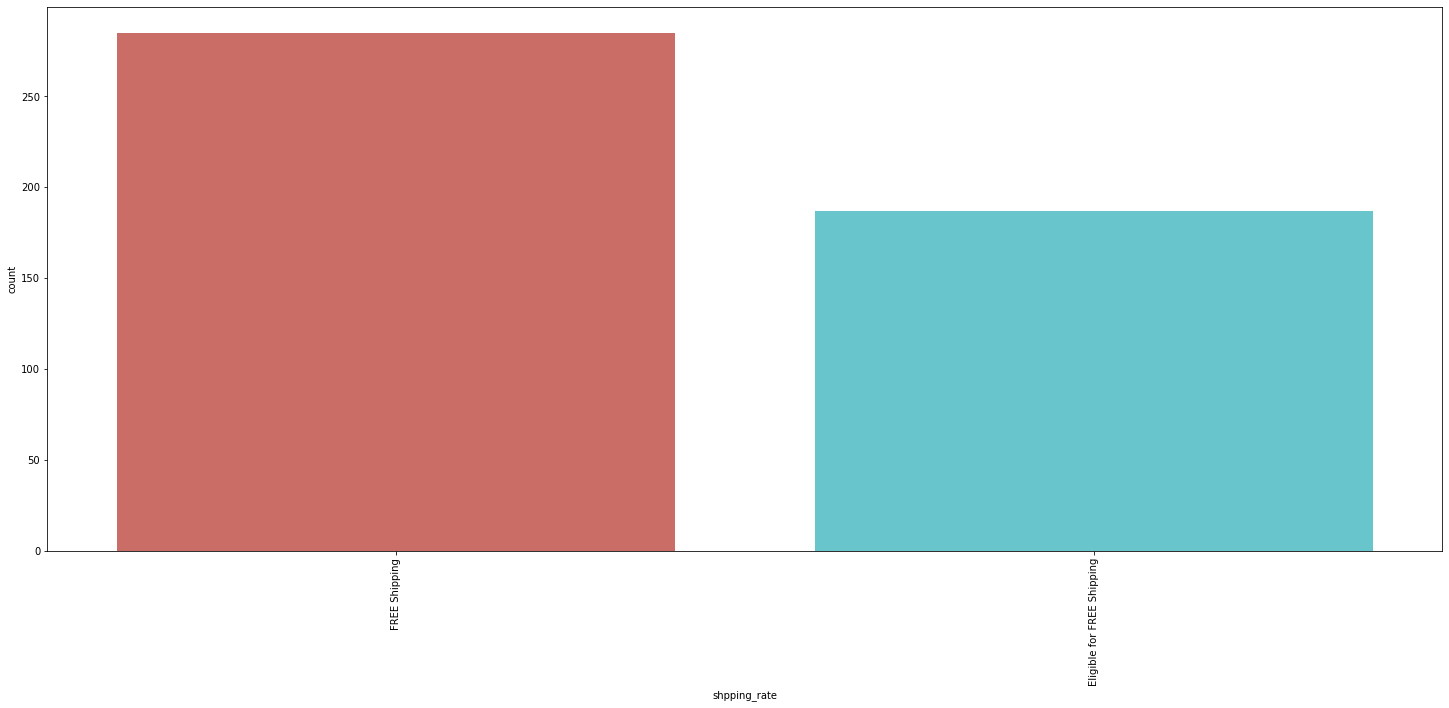

In [152]:
plt.figure(figsize=(25,10))
fig = sns.countplot(x=df['shpping_rate'],palette="hls", order = df['shpping_rate'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## dapat dilihat bahwa banyak yang lebih tertarik menggunakan free shipping
## padahal apabila ada opsi untuk free shipping or not, kita tidak rugi apa apa, karena shipping ditanggung pembeli
## namun lebih baik free shipping, karena customer cenderung akan membeli apabila melihat promos free shipping, karena terkesan akan lebih murah.
## kemudian dapat dilihat untuk free shipping bersyarat jauh lebih rendah.

In [153]:
discount = pd.crosstab(index = [df["category"],df["product"],df["shpping_rate"]],columns='TOTAL')
discount.sort_values('TOTAL',ascending=False)

col_0                                                                                                TOTAL
category              product                                            shpping_rate                     
Watches               Hugo Boss Casual Round Watch for Men               FREE Shipping                   2
Casual & Dress Shoes  Lacoste Casual Shoe for Men Size 42 EU - Black     FREE Shipping                   2
                      Lacoste Casual Shoe for Men Size 44 EU - White     FREE Shipping                   2
Eyewear               Polaroid Sunglasses for Unisex , Blue              Eligible for FREE Shipping      2
Wallets               Levi's Men's Trifold Wallet [31LV1179]             Eligible for FREE Shipping      1
                      Levi's Men Slimfold Wallet, Brown 31LV220010       Eligible for FREE Shipping      1
                      Kenneth Cole REACTION Men's RFID Security Block... Eligible for FREE Shipping      1
                      Dockers Bifold Mens Wallet - 31DK240z01-Brown      Eligible for FREE Shipping      1
                      Dickies Trifold Wallet for Men,Brown,31DI210003... Eligible for FREE Shipping      1
                      Dickies Trifold Wallet for Men - 31DI210004-Red    Eligible for FREE Shipping      1
                      Dickies Bifold Mens Wallet - 31DI1305-Brown        Eligible for FREE Shipping      1
                      DOWNTOWN MINI CC WALLET Men’s Purse, Multicolou... Eligible for FREE Shipping      1
                      Calvin Klein Elevated Slimfold 6cc, Men’s Credi... Eligible for FREE Shipping      1
                      Calvin Klein Bifold Wallet for Men , Black         Eligible for FREE Shipping      1
Sportswear            adidas Logo Sport Tank Top for Women - Black       Eligible for FREE Shipping      1
Athletic Shoes        Adidas Asweerun Running Shoes For Men - Core Black Eligible for FREE Shipping      1
Sportswear            adidas Essentials Linear Sport Tank Top for Wom... Eligible for FREE Shipping      1
                      adidas Design 2 Move 3 Stripes Sport Tank Top f... Eligible for FREE Shipping      1
                      adidas   Colorblock 3/4 Sport Leggings for Wome... Eligible for FREE Shipping      1
                      adidas   Color Block High Rise 3/4 Logo Print S... Eligible for FREE Shipping      1
                      Under Armour Training T-Shirt for Men              Eligible for FREE Shipping      1
                      Under Armour T-Shirt for Men, Size M - Black       Eligible for FREE Shipping      1
                      Under Armour Rival Fleece Training Sports Pants... Eligible for FREE Shipping      1
                      Under Armour Mid Crossback Training Sports Bra ... Eligible for FREE Shipping      1
                      Under Armour Baseline Fleece Jogger7 Pant For M... Eligible for FREE Shipping      1
                      Under Armour Armour Sport Ss7 T-Shirt For Women... Eligible for FREE Shipping      1
                      Puma Lifestyle Sport Pant For Men , Black , L      Eligible for FREE Shipping      1
                      Nike 23 Alpha Dry Graphic Basketball Shorts For... Eligible for FREE Shipping      1
                      Champion Hemmed Edge Pants For Men, S, Black       Eligible for FREE Shipping      1
                      adidas Essentials Plain Sport T-shirt for Men -... Eligible for FREE Shipping      1
Wallets               Levis Trifold Wallet for Men - 31LV110021-Black    Eligible for FREE Shipping      1
                      Levis Bifold Mens Wallet - 31LV240012-Black        Eligible for FREE Shipping      1
                      Michael Kors Card Case For Women - Brown           Eligible for FREE Shipping      1
Watches               Akribos XXIV Women's Gold Dial Mixed Material B... FREE Shipping                   1
                      Akribos XXIV Women's Cream Dial Mixed Material ... FREE Shipping                   1
                      Akribos XXIV Swiss 

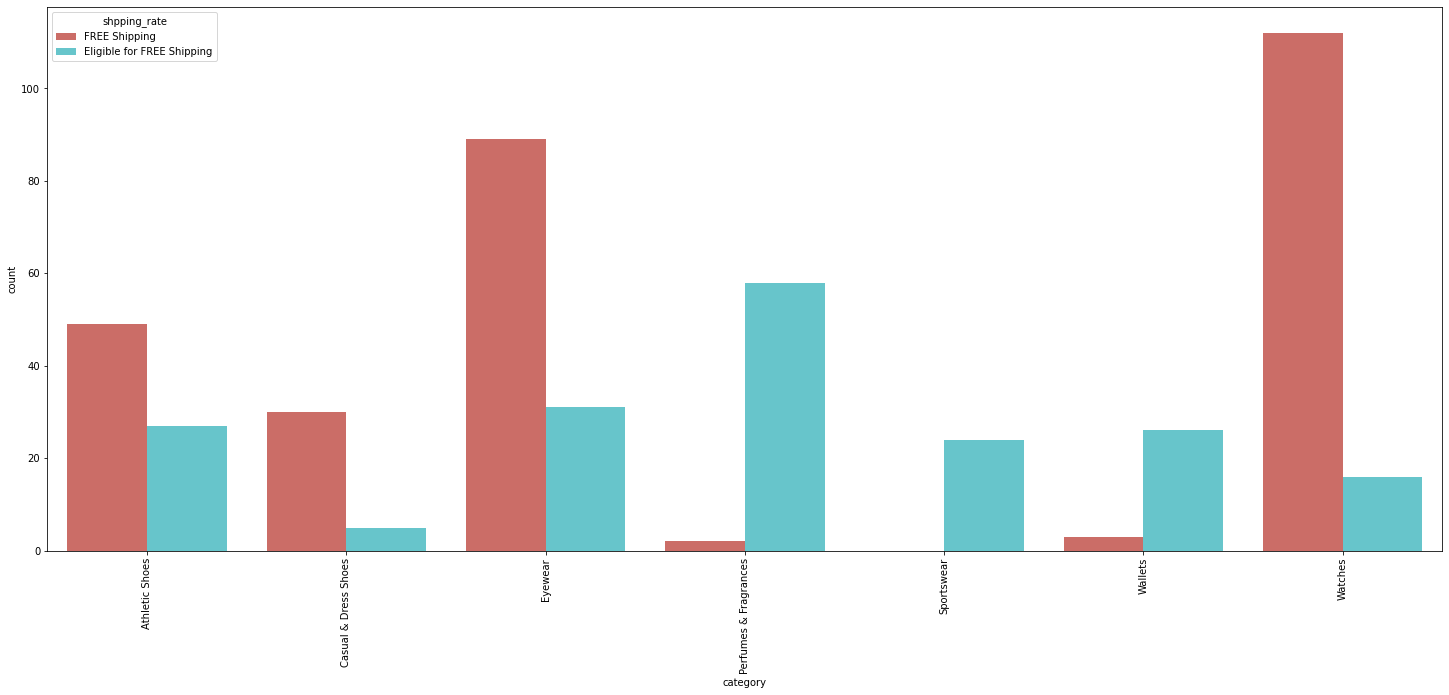

In [134]:
plt.figure(figsize=(25,10))
fig = sns.countplot(x=df['category'], hue=df['shpping_rate'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## beberapa barang terlihat tetap laku dengan free shipping bersyarat
## kemungkinan karena beberapa hal tersebut yang tergolong harganya diatas rata-rata seperti parfume
## maka dari itu pasti mencapai batas minimal untuk free shipping
## sedangkan untuk yang mengaktifkan fitur free shipping pada tokonya, sudah jelas lebih bnyak melakukan transaksi

In [154]:
df.head()

,category,product,Original_price,price,perc_of_unit_sold,shpping_rate,gender,Diskon
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,FREE Shipping,men,71.0
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,FREE Shipping,men,83.0
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,FREE Shipping,women,81.0
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,FREE Shipping,men,66.0
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,Eligible for FREE Shipping,men,75.0


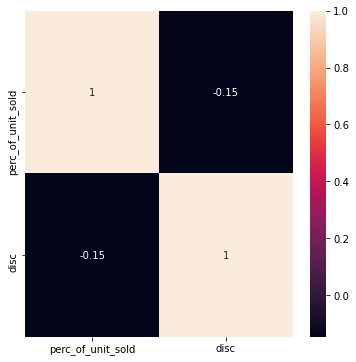

In [155]:
data = pd.DataFrame(data = {
    "perc_of_unit_sold" : df["perc_of_unit_sold"],
    "disc" : df["Diskon"]
})
plt.figure(figsize=(6,6))
sns.heatmap(data.corr("spearman"),annot=True)
plt.show()
## dapat dilihat pengaruh diskon tidak terlalu besar, bahkan hanya -0.15(range korelasi : -1 sampai 1)

## Kesimpulan
- Jam tangan prima menjadi barang paling laku.
- Untuk Kacamata unisex, menjadi terlaku diantara semua category untuk gender unisex.
- Untuk Diskon yang dapat diberikan untuk masing-masing category dan produk dapat dilihat pada crosstab yang dibuat.
- Diskon sebenarnya tidak memiliki pengaruh yang signifikan terhadap penjualan, namun dari data, dapat dilihat bahwa "free sheeping"-lah yang memiliki peran besar.
- Gender pria dapat menjadi target pasar, karena kebanyakan produk yang dibeli, adalah produk pria.
- Kemudian untuk spesifik produk apa yang paling laku, tidak dapat ditentukan, karena data masih sedikit, jadi total penjualan terbanyak juga masih cuman 2, tapi untuk secara umum, bisa dipilih untuk menjual berdasarkan category dan produk.

## Saran
- Untuk memutuskan apa yang akan dijual tidak bisa spesifik, namun bisa berdasarkan kategori dan product, jadi dijual secara umum kategori dan produk tertentu yang tergolong penjaualannya paling banyak. Misalkan jam tangan dan kacamata.
- item untuk gender pria, lebih banyak dibeli, sehingga jualah item untuk gender pria dan opsi lainnya, juallah item untuk unisex, karena bisa menjangkau pasar lebih luas.
- Untuk estimasi diskon untuk tiap produk, dapat dilihat pada tabel crosstab.
- Untuk para penjual,disarankan untuk menggunakan fitur free shipping, karena akan meningkatkan penjualan.